In [216]:
import pandas as pd
import numpy as np
from seaborn import heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [43]:
train_data = pd.read_csv("trainKNN.txt",sep = ",",names=["Id","RI","Na","Mg","Al","Si","K","Ca","Be","Fe","Type of glass"])
train_data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Be,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [59]:
train_data.shape

(196, 8)

In [44]:
train_data.drop("Id",axis = 1,inplace=True)
train_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Be,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [45]:
#From this correlation matrix we can see that "Ca" & "K" features have a very small impact on the 
#Class of the glass ie.e the class
#Also "RI" and "Ca" is heavily related
corr_matrix = train_data.corr()
corr_matrix

,RI,Na,Mg,Al,Si,K,Ca,Be,Fe,Type of glass
RI,1.000000,-0.158559,-0.153610,-0.446641,-0.530520,-0.296570,0.821277,0.009425,0.104980,-0.166670
Na,-0.158559,1.000000,-0.216384,0.234219,-0.196462,-0.248626,-0.278983,0.336526,-0.250335,0.484154
Mg,-0.153610,-0.216384,1.000000,-0.520530,-0.095263,-0.039185,-0.461244,-0.488494,0.066167,-0.714713
Al,-0.446641,0.234219,-0.520530,1.000000,0.010147,0.335160,-0.284701,0.477098,-0.067659,0.640944
Si,-0.530520,-0.196462,-0.095263,0.010147,1.000000,-0.181488,-0.197767,-0.162194,-0.058347,0.092812
K,-0.296570,-0.248626,-0.039185,0.335160,-0.181488,1.000000,-0.321540,-0.019632,-0.011720,0.029423
Ca,0.821277,-0.278983,-0.461244,-0.284701,-0.197767,-0.321540,1.000000,-0.100585,0.120076,-0.019545
Be,0.009425,0.336526,-0.488494,0.477098,-0.162194,-0.019632,-0.100585,1.000000,-0.030133,0.566769
Fe,0.104980,-0.250335,0.066167,-0.067659,-0.058347,-0.011720,0.120076,-0.030133,1.000000,-0.227560
Type of glass,-0.166670,0.484154,-0.714713,0.640944,0.092812,0.029423,-0.019545,0.566769,-0.227560,1.000000


<AxesSubplot:>

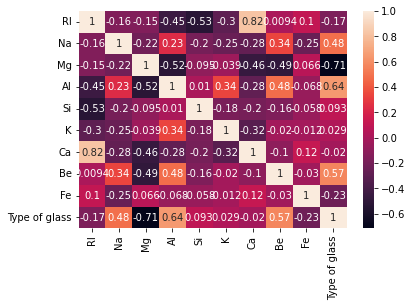

In [46]:
heatmap(corr_matrix,annot=True)

In [47]:
train_data.drop(["K","Ca"],axis = 1,inplace=True)
train_data.head()

,RI,Na,Mg,Al,Si,Be,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.0,0.0,1


In [40]:
data.isna().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
Be               0
Fe               0
Type of glass    0
dtype: int64

In [51]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]

In [120]:
stdScaler = StandardScaler()
tr_Xtrain = stdScaler.fit_transform(X_train)

In [203]:
knn1 = KNeighborsClassifier()
param = {"n_neighbors":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],"weights":["uniform","distance"],"p" : [1]}

In [204]:
gd1 = GridSearchCV(knn1,param,cv=4)
gd1.fit(tr_Xtrain,y_train)
bestParams1 = gd1.best_params_

In [205]:
model1 = KNeighborsClassifier(n_neighbors = bestParams1["n_neighbors"],weights = bestParams1["weights"],p = 1)
model1.fit(tr_Xtrain,y_train)

KNeighborsClassifier(n_neighbors=6, p=1, weights='distance')

In [206]:
knn2 = KNeighborsClassifier()
param = {"n_neighbors":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],"weights":["uniform","distance"],"p":[2]}

In [207]:
gd2 = GridSearchCV(knn2,param,cv=4)
gd2.fit(tr_Xtrain,y_train)
bestParams2 = gd2.best_params_

In [208]:
model2 = KNeighborsClassifier(n_neighbors = bestParams2["n_neighbors"],weights = bestParams2["weights"],p = 2)
model2.fit(tr_Xtrain,y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [196]:
test_data = pd.read_csv("testKNN.txt",sep = ",",names=["Id","RI","Na","Mg","Al","Si","K","Ca","Be","Fe","Type of glass"])
test_data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Be,Fe,Type of glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [116]:
test_data.shape

(18, 11)

In [117]:
test_data.drop(["K","Ca","Id"],axis = 1,inplace=True)
test_data.head()

,RI,Na,Mg,Al,Si,Be,Fe,Type of glass
0,1.52152,13.05,3.65,0.87,72.32,0.0,0.17,1
1,1.52152,13.12,3.58,0.90,72.20,0.0,0.16,1
2,1.52300,13.31,3.58,0.82,71.99,0.0,0.03,1
3,1.51709,13.00,3.47,1.79,72.72,0.0,0.00,2
4,1.51660,12.99,3.18,1.23,72.97,0.0,0.24,2


In [118]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [211]:
tr_Xtest = stdScaler.transform(X_test)

In [212]:
model1.score(tr_Xtest,y_test)

0.5555555555555556

In [220]:
f1_score(model1.predict(tr_Xtest),y_test, average = "weighted")

0.6164021164021164

In [213]:
model2.score(tr_Xtest,y_test)

0.5555555555555556

In [221]:
f1_score(model2.predict(tr_Xtest),y_test, average = "weighted")

0.5981240981240981

In [183]:
neighbors = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
model1_errors = []
model2_errors = []

for n in neighbors:
    model1 = KNeighborsClassifier(n_neighbors = n,weights = bestParams1["weights"],p = 1)
    model1.fit(tr_Xtrain,y_train)
    model1_errors.append(1-model1.score(tr_Xtest,y_test))
    model2 = KNeighborsClassifier(n_neighbors = n,weights = bestParams2["weights"],p = 2)
    model2.fit(tr_Xtrain,y_train)
    model2_errors.append(1-model2.score(tr_Xtest,y_test)) 

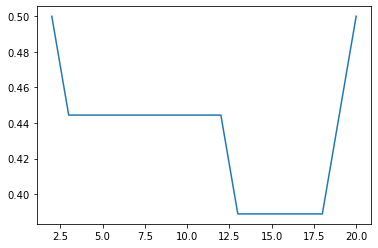

In [177]:
plt.plot(neighbors,model1_errors)

In [200]:
final_model1 = KNeighborsClassifier(n_neighbors =13,weights = bestParams1["weights"],p = 1)
final_model1.fit(tr_Xtrain,y_train)
final_model1.score(tr_Xtest,y_test)

0.6111111111111112

In [218]:
f1_score(final_model1.predict(tr_Xtest),y_test, average = "weighted")

0.6682539682539682

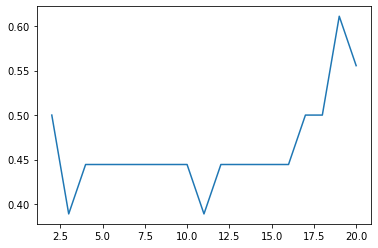

In [201]:
plt.plot(neighbors,model2_errors)

In [202]:
final_model2 = KNeighborsClassifier(n_neighbors = 3,weights = bestParams2["weights"],p = 2)
final_model2.fit(tr_Xtrain,y_train)
final_model2.score(tr_Xtest,y_test)

0.6111111111111112

In [219]:
f1_score(final_model2.predict(tr_Xtest),y_test, average = "weighted")

0.6354256854256853